# Gait Monitoring for Parkinson's Disease Patients
**Mentor**: Arthur Tay

## Project Description
The objective of this project is to monitor the gait patterns for people with Parkinson Disease. We will analyse the gait for PD patients during freezing and non-freezing (normal) events. Various parameters (e.g. cadence, step lengths, stride lengths, etc) related to gait will be derived from motion sensors (accelerometers, gyroscopes, magnetometers) using public datasets of PD patients. We will then investigate which of these parameters is most suitable for classification for freezing of gait in PD patients.

## Final Product
To make use of signal processing algorithms in extracting gait parameters from motion sensors and identifying most suitable parameters for classification of freezing of gait in PD patients.

## Methodology
Students will first need to review and understands how to extract gait parameters from motion sensors. There are different algorithms in the literature and they will need to investigate which is most suitable. They will then make use of a PD patient public dataset to test out their methods. If time permits, they will learn basic machine learning tools for classification.

## [GaitDB Dataset](https://www.physionet.org/content/gaitdb/1.0.0/)

### Data Description

Walking stride interval time series included are from 15 subjects: 5 healthy young adults (23 - 29 years old), 5 healthy old adults (71 - 77 years old), and 5 older adults (60 - 77 years old) with Parkinson's disease. The file name indicates old (o), young (y) or Parkinson's disease (pd). For the old and young subjects, the age (in years) is also included in the filename.

Subjects walked continuously on level ground around an obstacle-free path. The stride interval was measured using ultra-thin, force sensitive resistors placed inside the shoe. The analog force signal was sampled at 300 Hz with a 12 bit A/D converter, using an ambulatory, ankle-worn microcomputer that also recorded the data. Subsequently, the time between foot-strikes was automatically computed. The method for determining the stride interval is a modification of a previously validated method that has been shown to agree with force-platform measures, a “gold” standard.

Data were collected from the healthy subjects as they walked in a roughly circular path for 15 minutes, and from the subjects with Parkinson’s disease as they walked for 6 minutes up and down a long hallway.

### Imports

In [1]:
import np # main library for numeric calculations
import pandas as pd # main library for data analysis
import matplotlib.pyplot as plt # main library for data plotting
#import seaborn as sns
#sns.set() # mainly to set style of the plot
from glob import glob # check files
from math import *
import scipy as sp # STEM software
from scipy import signal

"""
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)"""

import warnings
warnings.filterwarnings('ignore') # literally to ignore all the warnings that don't matter

%matplotlib inline
# to place plotting inside the diagram

### Get Data

In [2]:
gaitdb = []
gaitDBnames = []
for i in sorted(glob("gaitdb/*.txt")):
    gaitDBnames.append(i.split("\\")[-1])
    gaitdb.append(pd.read_csv(i, sep="\t", names=["time", "stride_time"]))

gaitdb[0]

,time,stride_time
0,30.797,1.023
1,31.820,1.030
2,32.850,1.017
3,33.867,1.027
4,34.893,1.043
...,...,...
810,865.780,0.997
811,866.777,0.993
812,867.770,1.007
813,868.777,1.013


### Plotting Initial Graphs

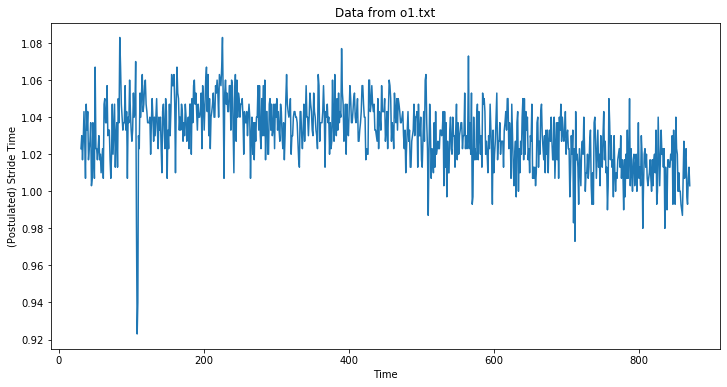

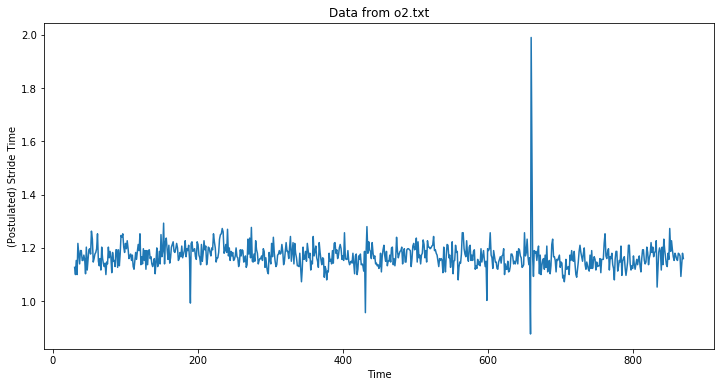

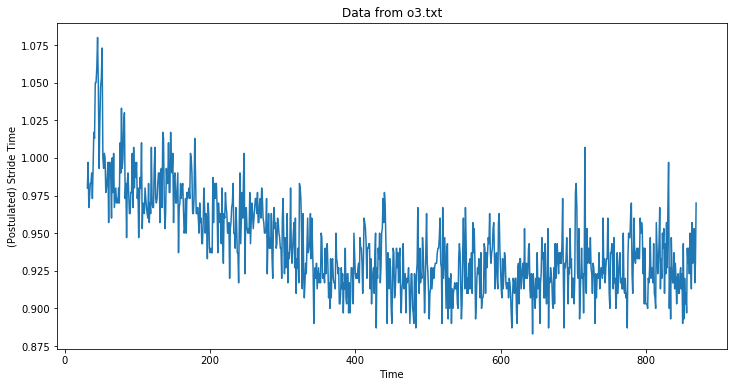

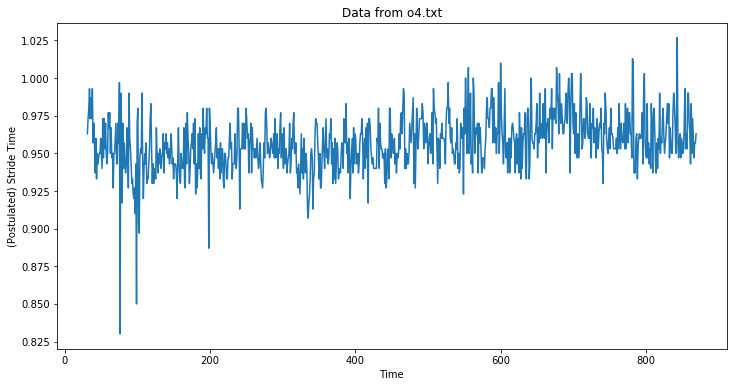

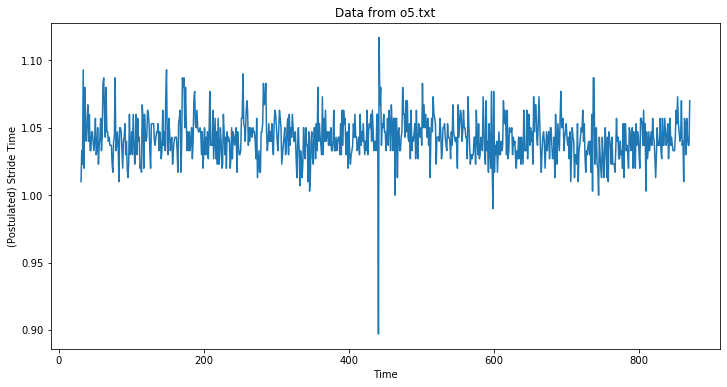

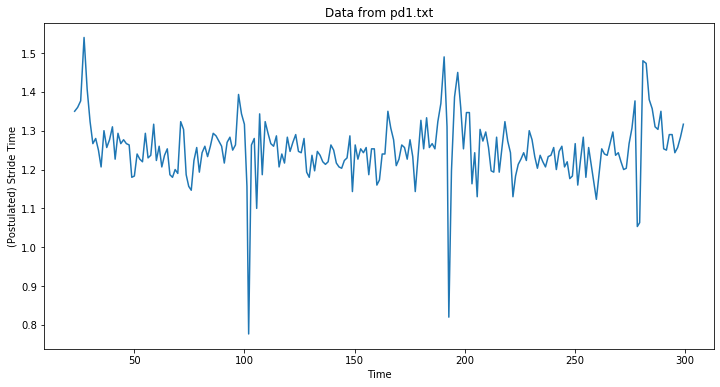

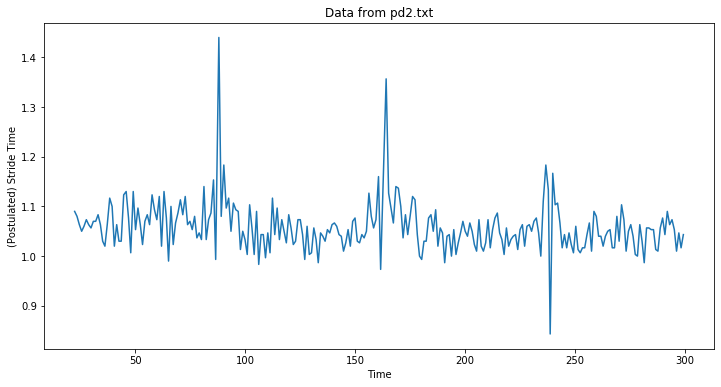

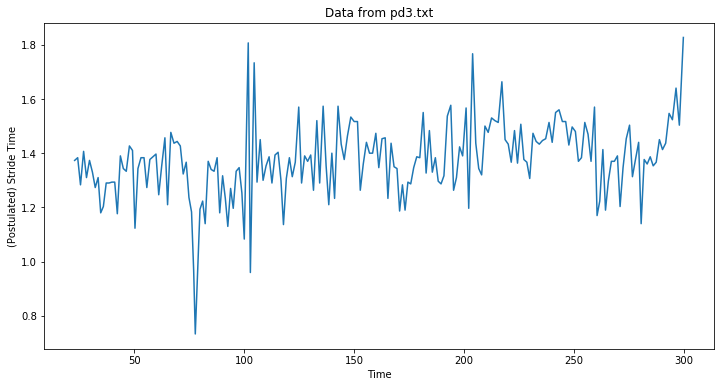

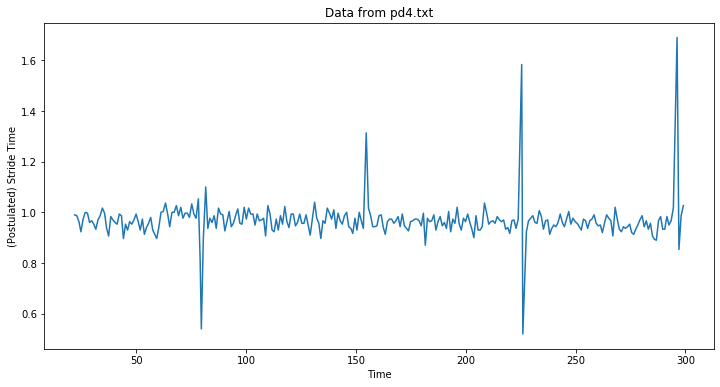

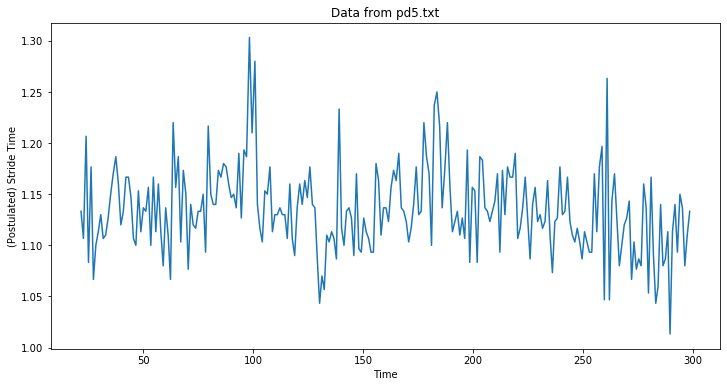

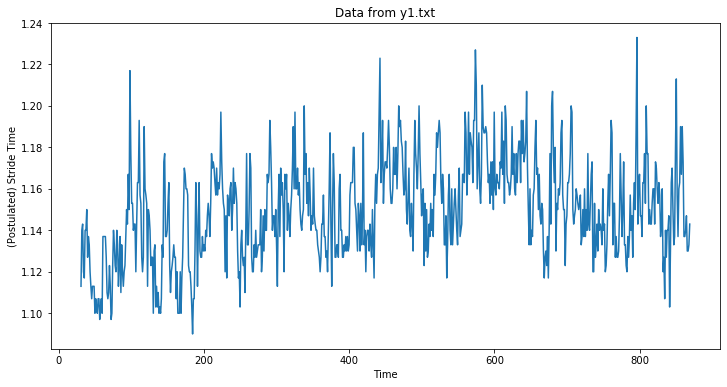

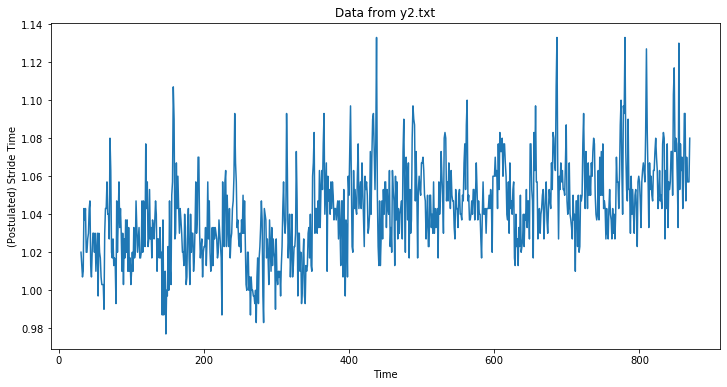

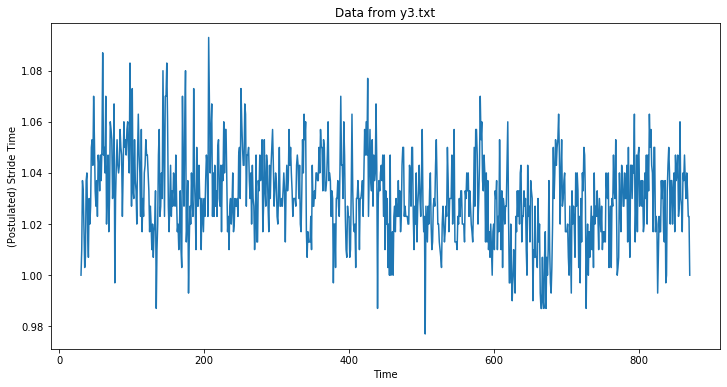

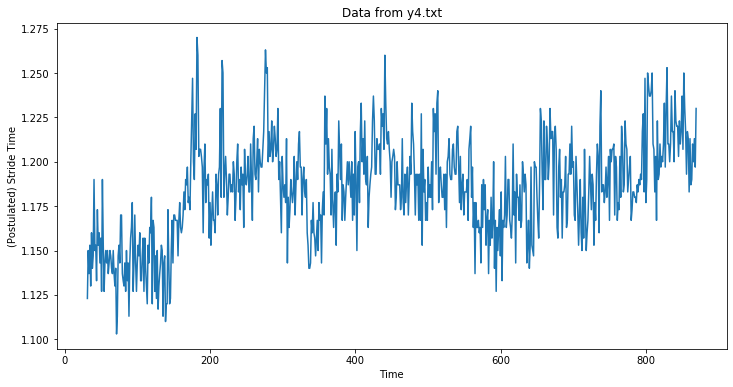

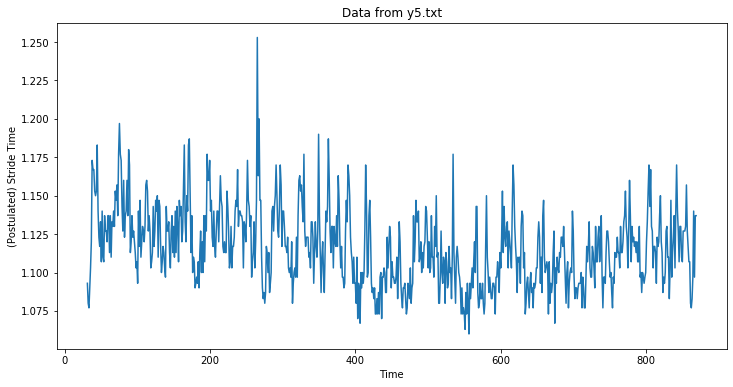

In [3]:
for i in range(len(gaitdb)):
    plt.figure(figsize=(12, 6))
    plt.plot(gaitdb[i]["time"], gaitdb[i]["stride_time"])
    plt.title("Data from "+gaitDBnames[i])
    plt.ylabel("(Postulated) Stride Time")
    plt.xlabel("Time")
    plt.show()

### Logistic Regression Functions

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z));

def logReg(iterations=50):
    global theta
    alpha = 10
    J = float("inf")
    for i in range(iterations):
        h = sigmoid(theta @ X)[np.newaxis].T
        J_temp = (-Y.T @ np.log(h)) - ((1 - Y).T @ np.log(1 - h))
        if isnan(J_temp) or isinf(J_temp): break
        elif J_temp > J: print(J_temp)
        J = J_temp
        theta = theta - alpha/m * (X @ (h - Y)).T[0]
    print(theta)

### Variance-based Analysis

In [5]:
variances = []
for i in range(15):
    var = gaitdb[i].var()["stride_time"]
    print(gaitDBnames[i][:-5]+":", var)
    variances.append(var)

o: 0.0003150203102154013
o: 0.0025416611883789233
o: 0.0009108964281580096
o: 0.00033811834137756824
o: 0.0002692188292773129
pd: 0.006372048896702135
pd: 0.00254124891039967
pd: 0.0197283147651563
pd: 0.006288075749128922
pd: 0.0017474187480762782
y: 0.0005700363342540924
y: 0.0005673018078695489
y: 0.0002956847106940924
y: 0.0007965643741085166
y: 0.0006283753293481047


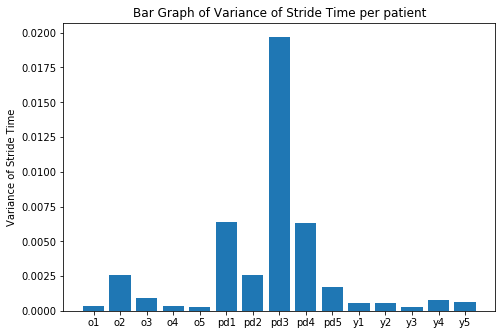

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Variance of Stride Time")
ax.set_title("Bar Graph of Variance of Stride Time per patient")
ax.bar([i[:-4] for i in gaitDBnames], variances)
plt.show()

#### Logistic Regression Data Preparation

In [8]:
X = np.array([[1]*15, variances])
Y = np.array([0]*5 + [1]*5 + [0]*5)[np.newaxis].T
theta = np.array([0, 1])
m = 15

#### Logistic Regression Brute Force

In [10]:
logReg(5000000) # tried twice

[  -4.50241442 2090.35672887]


#### Testing Validity

In [11]:
theta0, theta1 = tuple(theta)
for i in range(15):
    print(gaitDBnames[i][:-5]+":", sigmoid(theta0 + theta1*variances[i]))

h = sigmoid(theta @ X)
np.round(h)

o: 0.020960965456681777
o: 0.6922297080275551
o: 0.06924688221484637
o: 0.021975071354770264
o: 0.019083728829316665
pd: 0.9998518949865342
pd: 0.6920460713603303
pd: 1.0
pd: 0.999823481270244
pd: 0.2994987554473062
y: 0.03520134528144031
y: 0.03500772762026932
y: 0.020147380465463514
y: 0.05534096091562478
y: 0.03958611787942368


array([0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

### Final Plots

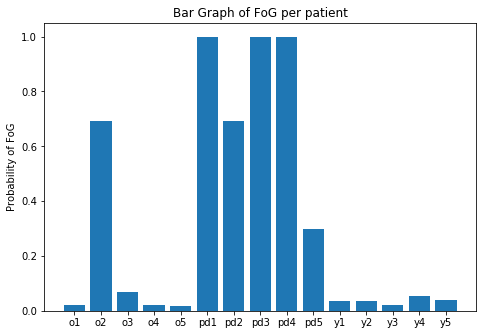

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Probability of FoG")
ax.set_title("Bar Graph of FoG per patient")
ax.bar([i[:-4] for i in gaitDBnames], h)
plt.show()

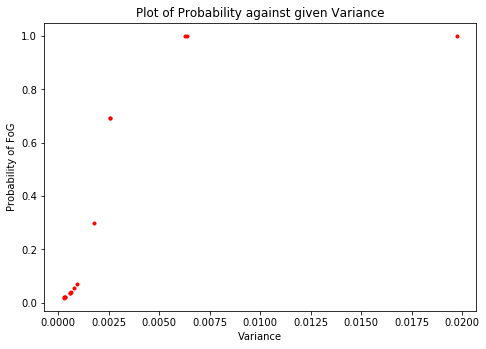

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Variance")
ax.set_ylabel("Probability of FoG")
ax.set_title("Plot of Probability against given Variance")
ax.plot(variances, h, "r.")
plt.show()

### Precision, Recall, Accuracy and F1 Scores
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
accuracy = (tp+tn)/15
f1 = 2(recall)(precision)/(recall+precision)

In [14]:
Y.T[0] == np.round(h)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True])

In [15]:
accuracy = sum(Y.T[0] == np.round(h))/m
accuracy

0.8666666666666667

In [16]:
preds = np.round(h)
actuals = Y.T[0]
tp = fp = tn = fn = 0
for i in range(m):
    actual = actuals[i]
    pred = preds[i]
    if actual == 1 and pred == 1: tp += 1
    elif actual == 0 and pred == 1: fp += 1
    elif actual == 0 and pred == 0: tn += 1
    else: fn += 1

print(tp, fp, tn, fn)

4 1 9 1


In [17]:
precision = tp/(tp+fp)
precision

0.8

In [18]:
recall = tp/(tp+fn)
recall

0.8

In [19]:
specificity = tn/(tn+fp)
specificity

0.9

In [20]:
f1 = 2*(recall)*(precision)/(recall+precision)
round(f1, 1)

0.8

| Precision | Recall | Specificity | Accuracy | F1 Score |
| --- | --- | --- | --- | --- |
| 0.80 | 0.80 | 0.90 | 0.867 | 0.80 |

## [Daphnet Dataset](https://archive.ics.uci.edu/ml/datasets/Daphnet+Freezing+of+Gait#:~:text=Data%20Set%20Information%3A,on%20generating%20many%20freeze%20events.)
(suggested by Prof Tay)

### Data Description

The Daphnet Freezing of Gait Dataset Freezing of Gait in users with Parkinson disease (hereafter Daphnet Freezing of Gait Dataset) is a dataset devised to benchmark automatic methods to recognize gait freeze from wearable acceleration sensors placed on legs and hip.

The dataset was recorded in the lab with emphasis on generating many freeze events. Users performed there kinds of tasks: straight line walking, walking with numerous turns, and finally a more realistic activity of daily living (ADL) task, where users went into different rooms while fetching coffee, opening doors, etc.

This dataset is the result of a collaboration between the Laboratory for Gait and Neurodynamics, Tel Aviv Sourasky Medical Center, Israel and the Wearable Computing Laboratory, ETH Zurich, Switzerland. Recordings were run at the Tel Aviv Sourasky Medical Center in 2008. The study was approved by the local Human Subjects Review Committee, and was performed in accordance with the ethical standards of the Declaration of Helsinki.

This dataset was collected as part of the EU FP6 project Daphnet, grant number 018474-2.
Additional effort to publish this dataset was supported in part by the EU FP7 project CuPiD, grant number 288516.

### Data Attributes
1. Time of sample in millisecond
2. Ankle (shank) acceleration - horizontal forward acceleration (mg)
3. Ankle (shank) acceleration - vertical (mg)
4. Ankle (shank) acceleration - horizontal lateral (mg)
5. Upper leg (thigh) acceleration - horizontal forward acceleration (mg)
6. Upper leg (thigh) acceleration - vertical (mg)
7. Upper leg (thigh) acceleration - horizontal lateral (mg)
8. Trunk acceleration - horizontal forward acceleration (mg)
9. Trunk acceleration - vertical (mg)
10. Trunk acceleration - horizontal lateral (mg)
11. Annotations (see Annotations section)

#### Annotations
The meaning of the annotations are as follows:
0: not part of the experiment. For instance the sensors are installed on the user or the user is performing activities unrelated to the experimental protocol, such as debriefing
1: experiment, no freeze (can be any of stand, walk, turn)
2: freeze

### Get Data

In [21]:
daphnet = []
daphnet_thigh = []
daphnet_shank = []
daphnetNames = []
for i in sorted(glob("daphnet/*.txt")):
    daphnetNames.append(i.split("\\")[-1])
    daphnet.append(pd.read_csv(i, sep=" ", names=["time", "shank_h_fd", "shank_v", "shank_h_l", "thigh_h_fd", "thigh_v", "thigh_h_l", "trunk_h_fd", "trunk_v", "trunk_h_l", "annotations"]))
    daphnet_thigh.append(daphnet[-1][["time", "thigh_h_fd", "thigh_v", "thigh_h_l", "annotations"]])
    daphnet_shank.append(daphnet[-1][["time", "shank_h_fd", "shank_v", "shank_h_l", "annotations"]])

daphnet[0]

,time,shank_h_fd,shank_v,shank_h_l,thigh_h_fd,thigh_v,thigh_h_l,trunk_h_fd,trunk_v,trunk_h_l,annotations
0,15,70,39,-970,0,0,0,0,0,0,0
1,31,70,39,-970,0,0,0,0,0,0,0
2,46,60,49,-960,0,0,0,0,0,0,0
3,62,60,49,-960,0,0,0,0,0,0,0
4,78,50,39,-960,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
151982,2374734,80,39,-960,9,-46,-1000,514,-390,-747,0
151983,2374750,60,39,-950,-9,-27,-979,514,-390,-718,0
151984,2374765,60,39,-950,-18,-37,-979,524,-390,-747,0
151985,2374781,60,29,-950,9,-46,-969,524,-390,-728,0


#### Plots

S01R01.txt


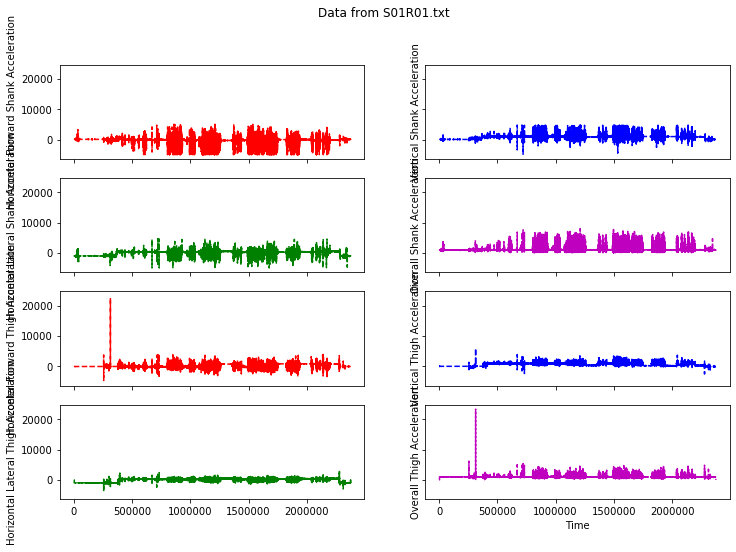

S01R02.txt


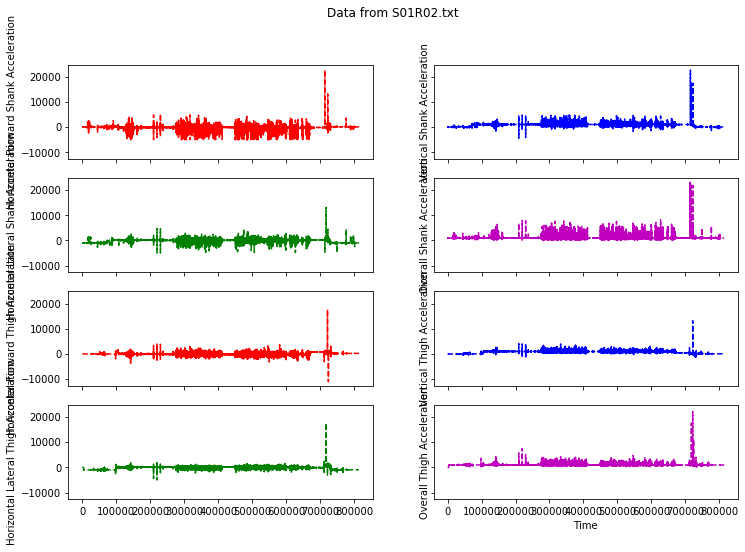

S02R01.txt


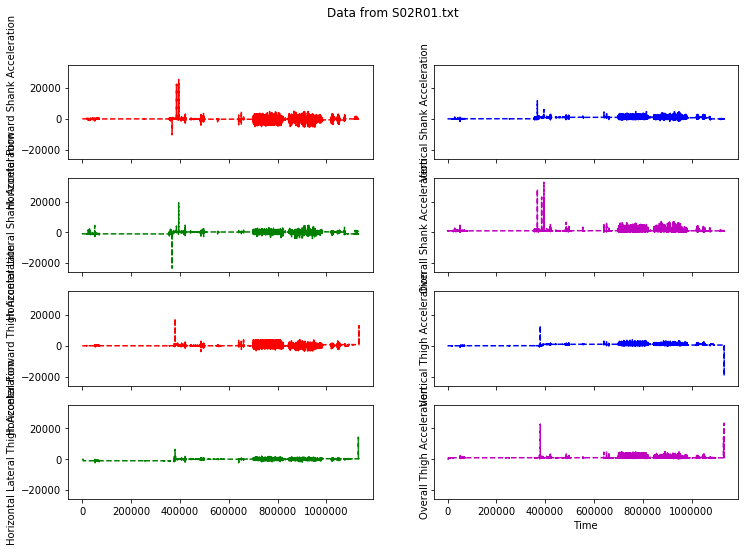

S02R02.txt


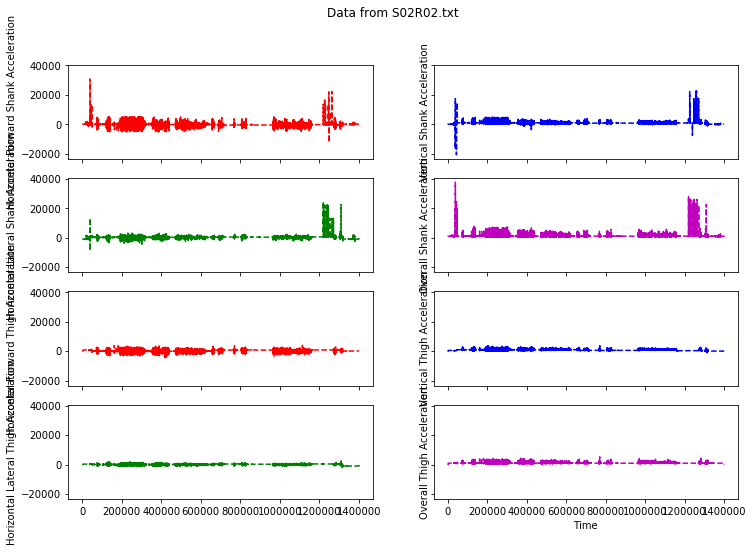

S03R01.txt


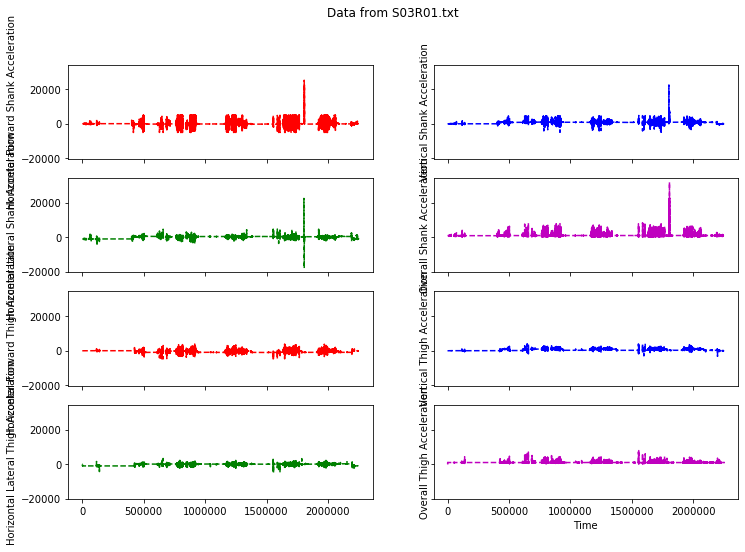

S03R02.txt


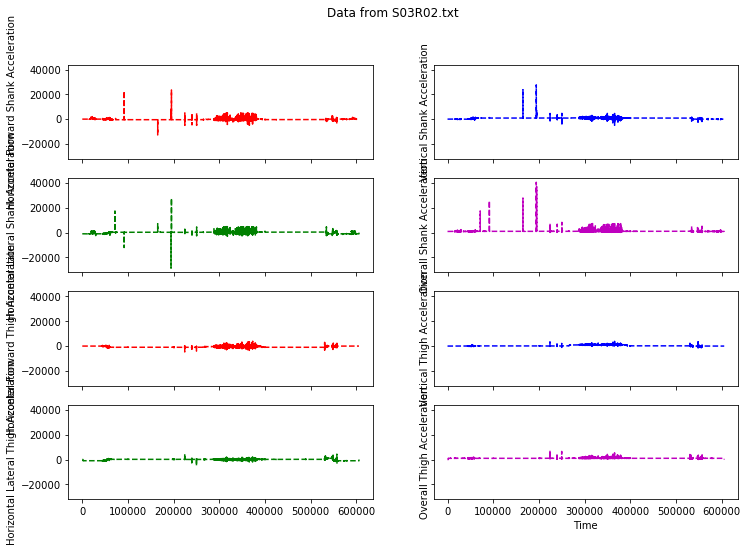

S03R03.txt


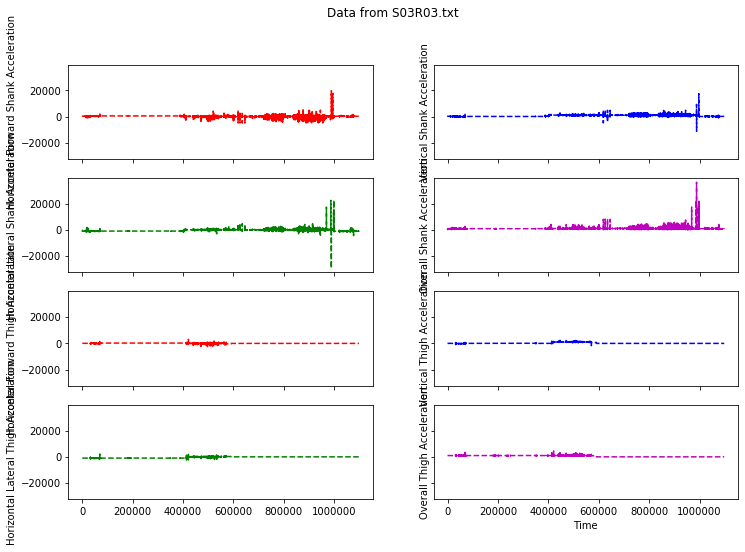

S04R01.txt


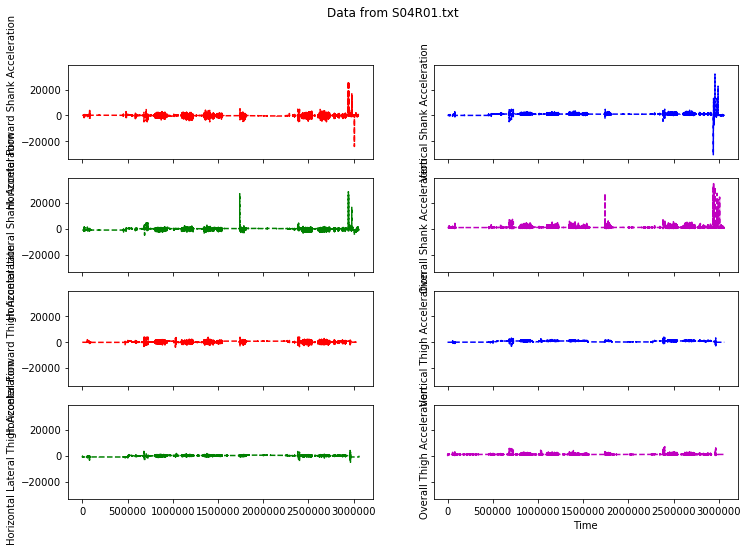

S05R01.txt


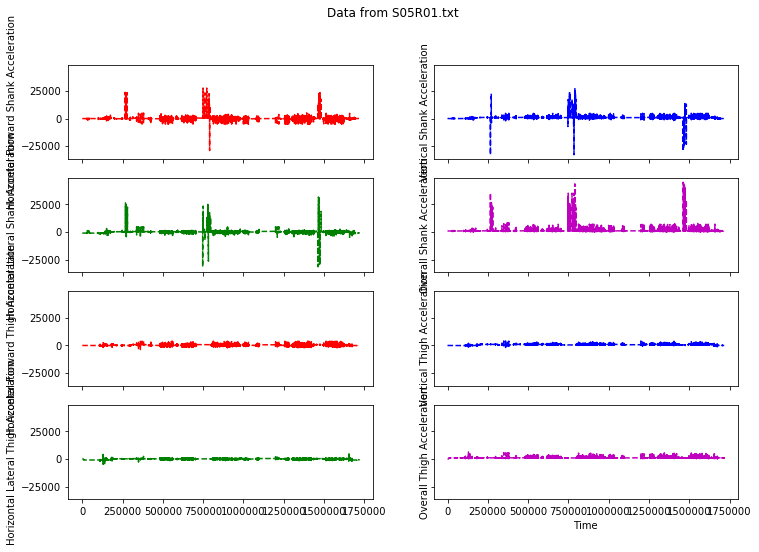

S05R02.txt


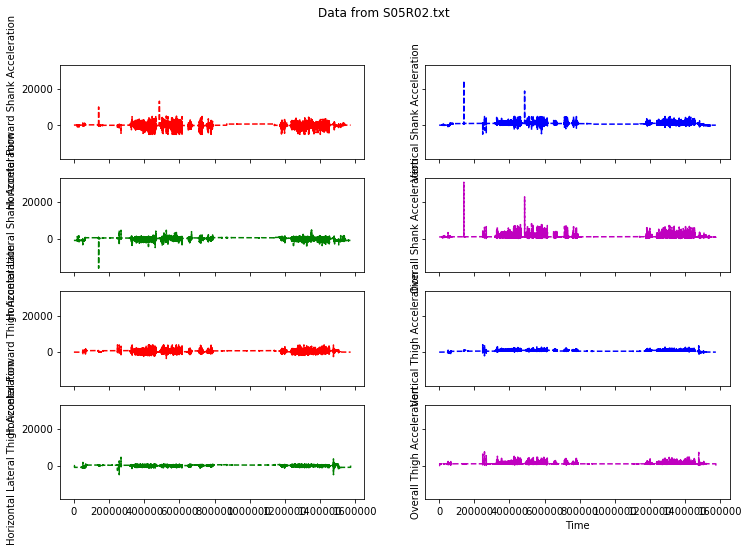

S06R01.txt


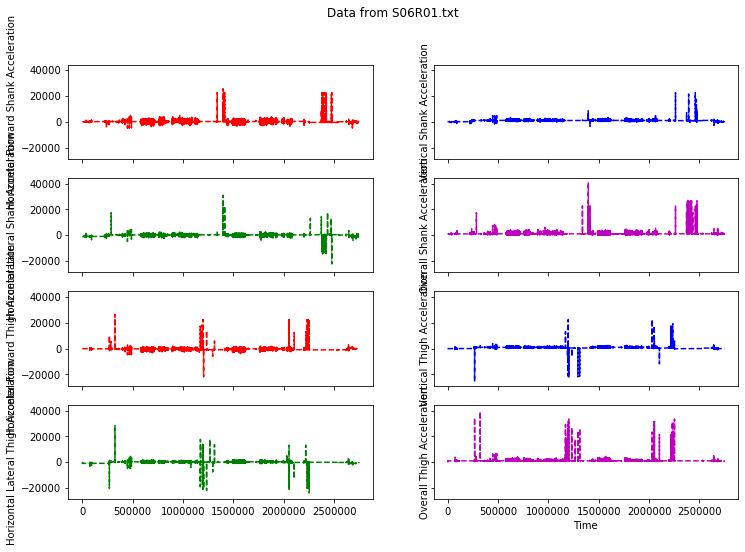

S06R02.txt


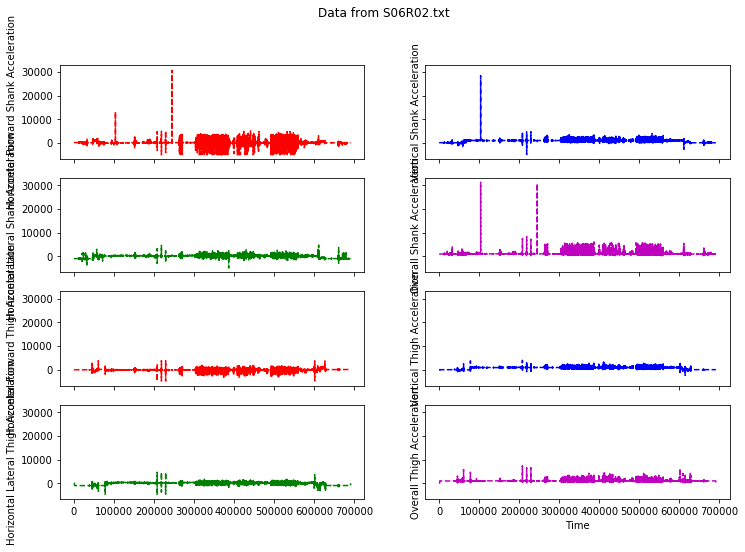

S07R01.txt


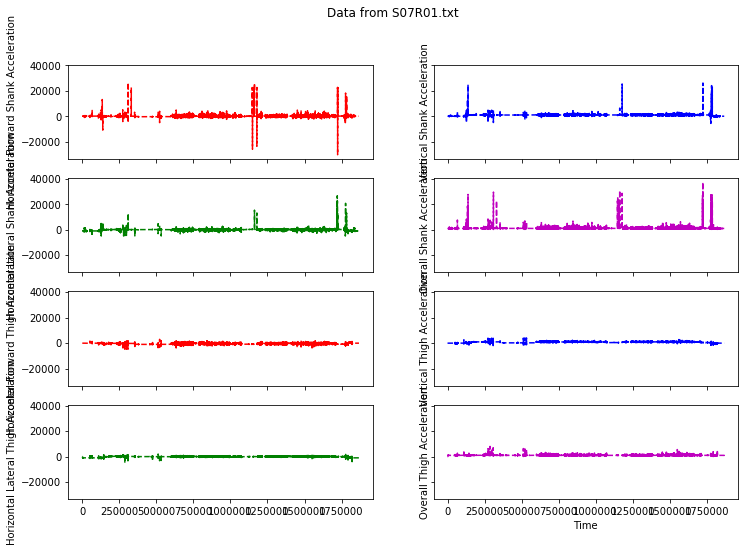

S07R02.txt


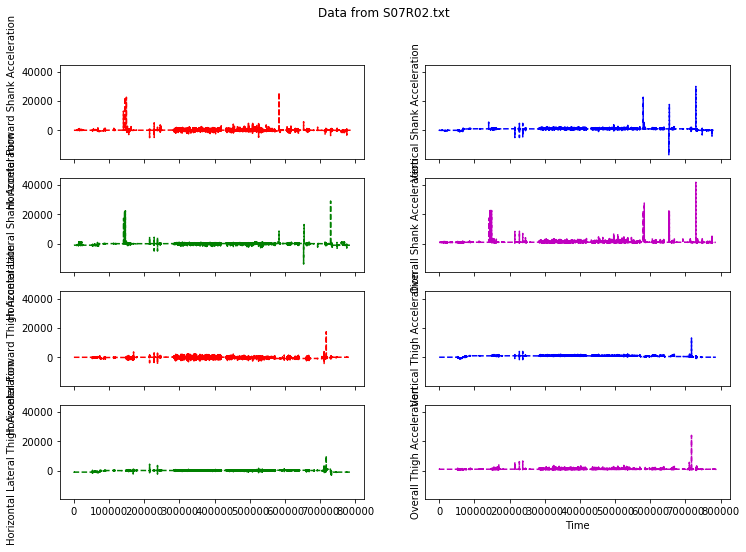

S08R01.txt


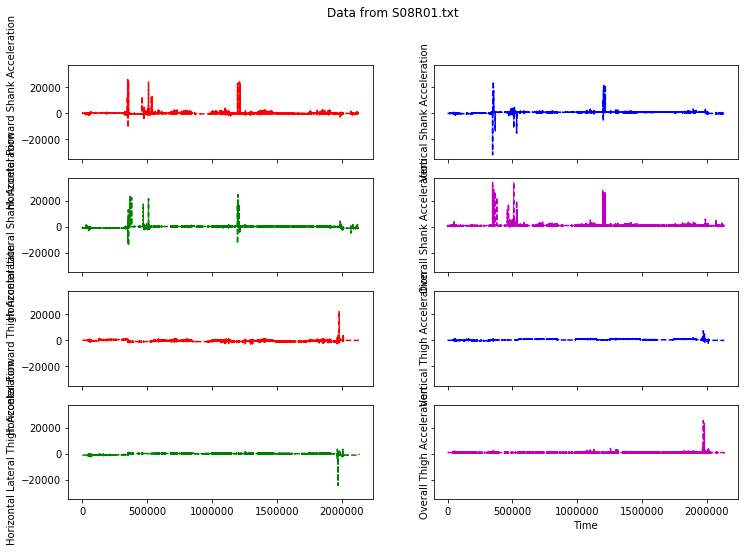

S09R01.txt


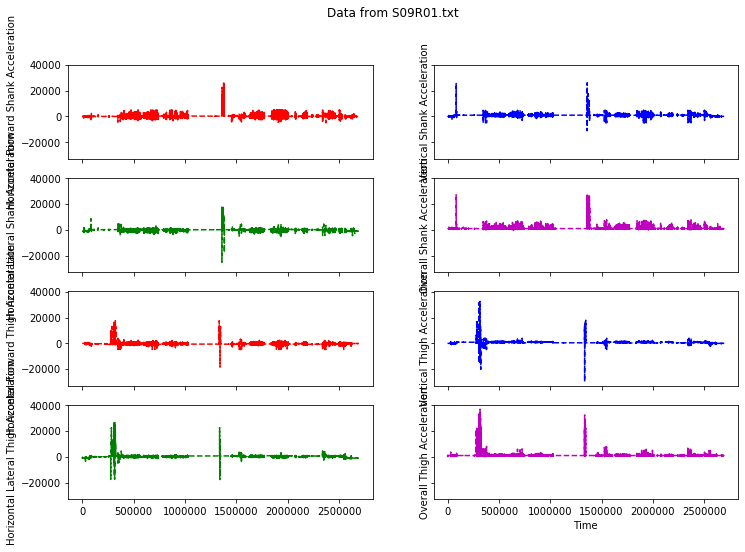

S10R01.txt


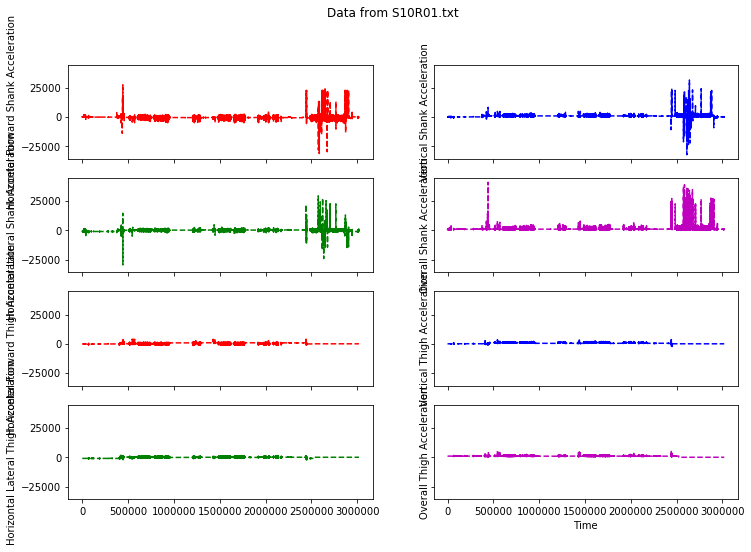

In [22]:
for i in range(len(daphnet)):
    print(daphnetNames[i])
    fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(12, 8))
    fig.suptitle("Data from "+daphnetNames[i])
    plt.xlabel("Time")
    
    ax1 = axes[0][0]
    ax1.plot(daphnet[i]["time"], daphnet[i]["shank_h_fd"], 'r--')
    ax1.set_ylabel("Horizontal Forward Shank Acceleration")
    
    ax2 = axes[0][1]
    ax2.plot(daphnet[i]["time"], daphnet[i]["shank_v"], 'b--')
    ax2.set_ylabel("Vertical Shank Acceleration")
    
    ax3 = axes[1][0]
    ax3.plot(daphnet[i]["time"], daphnet[i]["shank_h_l"], 'g--')
    ax3.set_ylabel("Horizontal Lateral Shank Acceleration")
    
    ax4 = axes[1][1]
    ax4.plot(daphnet[i]["time"], np.sqrt(daphnet[i]["shank_h_l"]**2 + daphnet[i]["shank_v"]**2 + daphnet[i]["shank_h_fd"]**2), 'm--')
    ax4.set_ylabel("Overall Shank Acceleration")
    
    ax1 = axes[2][0]
    ax1.plot(daphnet[i]["time"], daphnet[i]["thigh_h_fd"], 'r--')
    ax1.set_ylabel("Horizontal Forward Thigh Acceleration")
    
    ax2 = axes[2][1]
    ax2.plot(daphnet[i]["time"], daphnet[i]["thigh_v"], 'b--')
    ax2.set_ylabel("Vertical Thigh Acceleration")
    
    ax3 = axes[3][0]
    ax3.plot(daphnet[i]["time"], daphnet[i]["thigh_h_l"], 'g--')
    ax3.set_ylabel("Horizontal Lateral Thigh Acceleration")
    
    ax4 = axes[3][1]
    ax4.plot(daphnet[i]["time"], np.sqrt(daphnet[i]["thigh_h_l"]**2 + daphnet[i]["thigh_v"]**2 + daphnet[i]["thigh_h_fd"]**2), 'm--')
    ax4.set_ylabel("Overall Thigh Acceleration")
    
    plt.show()

#### Plots with Validation Stuff
Yes, I know that is unprofessional but sorry, ok.

In [ ]:
for ind in range(len(daphnet)):
    print(daphnetNames[ind])
    df = daphnet[ind]
    sub1 = df[df.annotations == 1]
    sub2 = df[df.annotations == 2]
    
    fig, axes = plt.subplots(6, 2, sharex=True, sharey=True, figsize=(12, 12))
    fig.suptitle("Data from "+daphnetNames[ind])
    plt.xlabel("Time")
    
    labels = ["shank_h_fd", "shank_v", "shank_h_l", "thigh_h_fd", "thigh_v", "thigh_h_l"]
    for i in range(6):
        sig = sp.signal.medfilt(df[labels[i]], 21)

        b, a = sp.signal.butter(5,0.05)
        y = sp.signal.filtfilt(b, a, df[labels[i]])
        
        
        ax1 = axes[i][0]
        ax1.plot(df.time, df[labels[i]])
        ax1.scatter(sub1.time, sub1[labels[i]], c='orange', label="no freeze")
        ax1.scatter(sub2.time, sub2[labels[i]], c='purple', label="freeze")
        ax1.legend()

        ax2 = axes[i][1]
        ax2.plot(df.time, y)
        ax2.scatter(sub1.time, sub1[labels[i]], c='orange', label="no freeze")
        ax2.scatter(sub2.time, sub2[labels[i]], c='purple', label="freeze")
        ax2.legend()
        
    plt.show()


### Code given by Dataset
Translated from Octave in code.py and subject.py (attached)

#### Subject Identification and Analysis
using OOP

In [ ]:
from subject import Subject
subjects = Subject.parse(daphnet, daphnetNames)
subjects

## [VGRF Dataset](https://physionet.org/content/gaitpdb/1.0.0/)
### Data Description

Parkinson's disease (PD) is one of the most common movement disorders, affecting approximately 1 million Americans (estimates range between 4 and 6.5 million people worldwide) and about 1% of older adults. In the US alone, 60,000 new cases are diagnosed each year. PD is a chronic and progressive neurological disorder that results in tremor, rigidity, slowness, and postural instability. A disturbed gait is a common, debilitating symptom; patients with severe gait disturbances are prone to falls and may lose their functional independence.

This database contains measures of gait from 93 patients with idiopathic PD (mean age: 66.3 years; 63% men), and 73 healthy controls (mean age: 66.3 years; 55% men). The database includes the vertical ground reaction force records of subjects as they walked at their usual, self-selected pace for approximately 2 minutes on level ground. Underneath each foot were 8 sensors ([Ultraflex Computer Dyno Graphy, Infotronic Inc.](http://www.infotronic.nl/#CDG)) that measure force (in Newtons) as a function of time. The output of each of these 16 sensors has been digitized and recorded at 100 samples per second, and the records also include two signals that reflect the sum of the 8 sensor outputs for each foot. For details about the format of the data, please see [this note](https://physionet.org/content/gaitpdb/1.0.0/format.txt).

With this information, one can investigate the force record as a function of time and location, derive measures that reflect the center-of-pressure as a function of time, and determine timing measures (e.g., stride time, swing time) for each foot as functions of time. Thus, one can study the stride-to-stride dynamics and the variability of these time series.

This database also includes demographic information, measures of disease severity (i.e., using the Hoehn & Yahr staging and/or the Unified Parkinson's Disease Rating Scale) and other related measures (available in HTML or xls spreadsheet format).

A subset of the database includes measures recorded as subjects performed a second task (serial 7 subtractions) while walking, as in the figure above, which shows excerpts of swing time series from a patient with PD (lower panels) and a control subject (upper panels), under usual walking conditions (at left) and when performing serial 7 subtractions (at right). Under usual walking conditions, variability is larger in the patient with PD (Coefficient of Variation = 2.7%), compared to the control subject (CV = 1.3%). Variability increases during dual tasking in the subject with PD (CV = 6.5%), but not in the control subject (CV = 1.2%). From Yogev et al. (reference [4] below).

### Data format

Each line contains 19 columns:

| Column | Description |
|--------|-------------|
| 1 | Time (in seconds)|
| 2-9 | **Vertical ground reaction force** (VGRF, in Newton) on each of 8 sensors located under the left foot |
| 10-17 |VGRF on each of the 8 sensors located under the right foot |
| 18 | Total force under the left foot |
| 19 | Total force under the right foot |


When a person is comfortably standing with both legs parallel to each
other, sensor locations inside the insole can be described (according
to the [Infotronic website](http://www.infotronic.nl/)) as lying
approximately at the following (X,Y) coordinates, assuming that the
origin (0,0) is just between the legs and the person is facing towards
the positive side of the Y axis:

| Sensor | X    | Y    |
|--------|------|------|
| L1     | -500 | -800 |
| L2     | -700 | -400 |
| L3     | -300 | -400 |
| L4     | -700 | 0    |
| L5     | -300 | 0    |
| L6     | -700 | 400  |
| L7     | -300 | 400  |
| L8     | -500 | 800  |
| R1     | 500  | -800 |
| R2     | 700  | -400 |
| R3     | 300  | -400 |
| R4     | 700  | 0    |
| R5     | 300  | 0    |
| R6     | 700  | 400  |
| R7     | 300  | 400  |
| R8     | 500  | 800  |

The X and Y numbers are in an arbitrary coordinate system reflecting
the relative (arbitrarily scaled) positions of the sensors within each
insole. During walking, the sensors inside each insole remain at the
same relative position, but the two feet are no longer parallel to
each other. Thus, this coordinate system enables a calculation of a
proxy for the location of the center of pressure (COP) under each
foot.

--------------------------

### Data file names
These follow a common convention, e.g., ```GaCo01_02.txt```  or  ```JuPt03_06.txt```, where

- Ga, Ju or Si – indicate the study from which the data originated:
 - Ga - Galit Yogev et al ([dual tasking in PD; Eur J Neuro, 2005](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1460-9568.2005.04298.x))
 - Ju – Hausdorff et al ([RAS in PD; Eur J Neuro, 2007](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1460-9568.2007.05810.x))
 - Si - Silvi Frenkel-Toledo et al ([Treadmill walking in PD; Mov Disorders, 2005](https://onlinelibrary.wiley.com/doi/abs/10.1002/mds.20507))

- Co or Pt: Control subject or a PD Patient respectively

- 01: Subject number in the group

- A walk number of 10  (for the "Ga" study) indicates a dual-task walking,
where the subject was engaged in serial-7 subtraction while walking.

- A walk number of 01 refers to a usual, normal walk. 

The sampling rate was 100 Hz.

### Get Data

In [ ]:
vgrf = []
VGRFnames = []
for i in sorted(glob("vgrf/*.txt")):
    VGRFnames.append(i)
    vgrf.append(pd.read_table(i, names=["time"]+["VGRF_left_"+str(i) for i in range(1, 9)]+["VGRF_right_"+str(i) for i in range(1, 9)]+["VGRF_left", "VGRF_right"]).set_index("time"))

vgrf[0]

### Plot Data

In [ ]:
dta = vgrf[0]
plt.figure(num=None, figsize=(50, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dta.index, dta[['VGRF_left']])
plt.figure(num=None, figsize=(50, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(dta.index, dta[['VGRF_right']])
plt.show()